In [21]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400)

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1


ModuleNotFoundError: No module named 'mplscience'

In [1]:
import anndata
import scanpy as sc

In [2]:
split = 1

In [3]:
adata_train_path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_train_{split}.h5ad"
adata_test_path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_test_{split}.h5ad"
adata_ood_path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_ood_{split}.h5ad"

In [4]:
adata_train = sc.read(adata_train_path)
adata_test = sc.read(adata_test_path)
adata_ood = sc.read(adata_ood_path)

In [5]:
adata = anndata.concat((adata_train, adata_test, adata_ood))

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
adata

AnnData object with n_obs × n_vars = 63878 × 2000
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type', 'cell_line', 'smiles_drug_1', 'smiles_drug_2', 'ood_1', 'ood_2', 'ood_3', 'ood_4'
    obsm: 'X_pca', 'X_umap', 'ecfp_drug_1', 'ecfp_drug_2'
    layers: 'counts'

In [9]:
combosciplex_color_dict = {
    'Alvespimycin+Pirarubicin': '#fa0e03',
    'Cediranib+PCI-34051': '#0d3290',
    'Dacinostat+Danusertib': '#33ff57',
    'Dacinostat+Dasatinib': '#6300b5',
    'Dacinostat+PCI-34051': '#88e200',
    'Givinostat+Carmofur': '#8e3101',
    'Givinostat+Cediranib': '#1F7530',
    'Givinostat+Crizotinib': '#6ca05c',
    'Givinostat+Curcumin': '#03cd4A',
    'Givinostat+Dasatinib': '#9106eb',
    'Givinostat+SRT1720': '#EB984E',
    'Givinostat+SRT2104': '#260374',
    'Givinostat+Sorafenib': '#ff5733',
    'Givinostat+Tanespimycin': '#a3e3af',
    'Panobinostat+Alvespimycin': '#46adaf',
    'Panobinostat+Crizotinib': '#8E1382',
    'Panobinostat+Curcumin': '#bdfd0b',
    'Panobinostat+Dasatinib': '#ce606c',
    'Panobinostat+PCI-34051': '#795548',
    'Panobinostat+SRT1720': '#22bb34',
    'Panobinostat+SRT2104': '#8D6E63',
    'Panobinostat+SRT3025': '#9d8303',
    'Panobinostat+Sorafenib': '#d7fdfd',
    'SRT2104+Alvespimycin': '#6ea3fa',
    'SRT3025+Cediranib': '#f502f3',
    'control+Alvespimycin': '#fd4c7a',
    'control+Dacinostat': '#d6a5fa',
    'control+Dasatinib': '#2d62a3',
    'control+Givinostat': '#5deb2e',
    'control+Panobinostat': '#b1cd3f',
    'control+SRT2104': '#7788cd',
    'control': '#8f97a8',
    'not ood': '#D3D3D3',
}


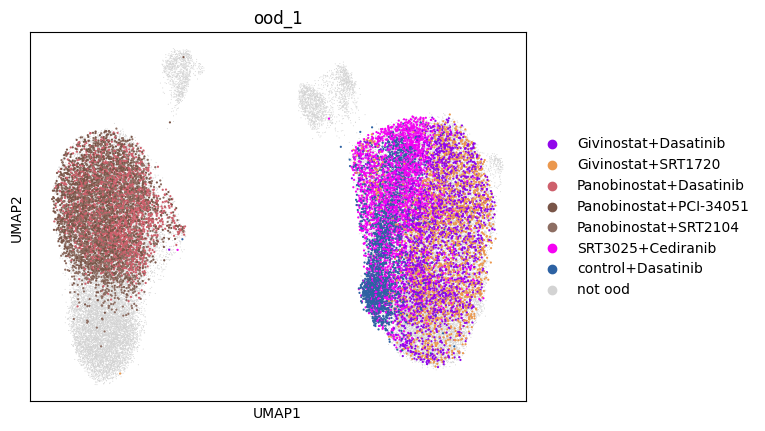

In [12]:
sizes = adata.obs.apply(lambda x: 2.0 if x["ood_1"]=="not ood" else 10.0, axis=1)
sc.pl.umap(adata, color='ood_1', palette=combosciplex_color_dict, s=sizes.values)

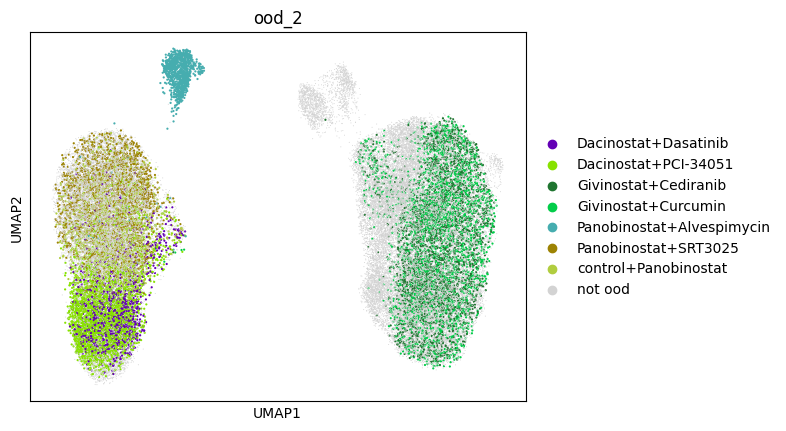

In [13]:
sizes = adata.obs.apply(lambda x: 2.0 if x["ood_2"]=="not ood" else 10.0, axis=1)
sc.pl.umap(adata, color='ood_2', palette=combosciplex_color_dict, s=sizes.values)

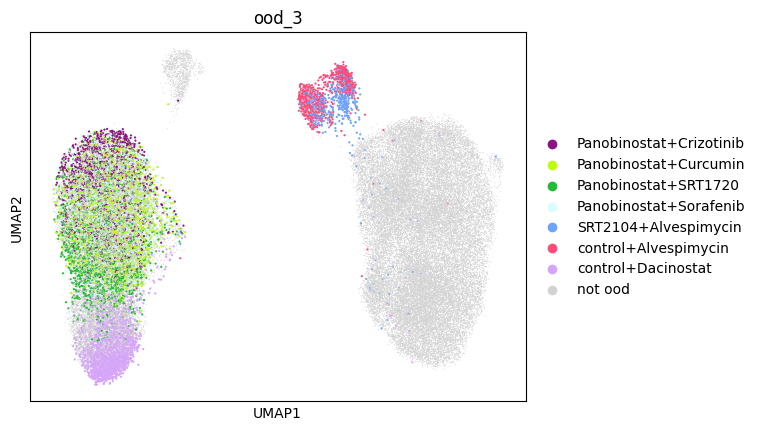

In [14]:
sizes = adata.obs.apply(lambda x: 2.0 if x["ood_3"]=="not ood" else 10.0, axis=1)
sc.pl.umap(adata, color='ood_3', palette=combosciplex_color_dict, s=sizes.values)

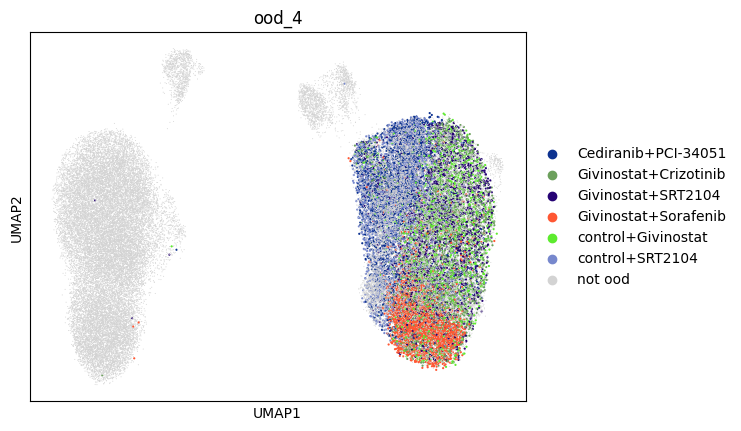

In [15]:
sizes = adata.obs.apply(lambda x: 2.0 if x["ood_4"]=="not ood" else 10.0, axis=1)
sc.pl.umap(adata, color='ood_4', palette=combosciplex_color_dict, s=sizes.values)

In [18]:
adata.obs["control_str"] = adata.obs.apply(lambda x: "control" if x["control"] else "not ood", axis=1)

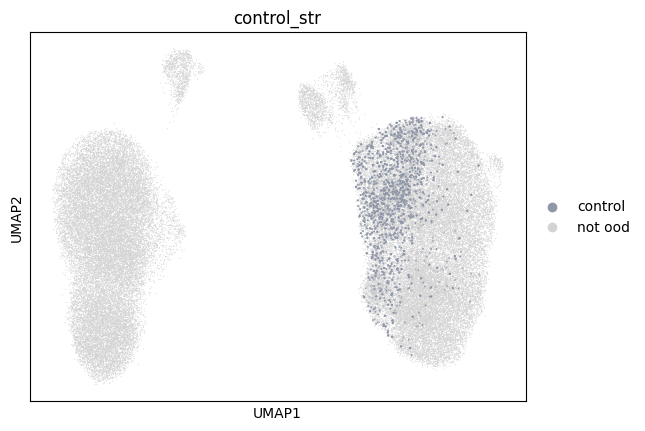

In [20]:
sizes = adata.obs.apply(lambda x: 2.0 if not x["control"] else 10.0, axis=1)
sc.pl.umap(adata, color="control_str", palette=combosciplex_color_dict, s=sizes.values)